# Sentiment Analysis

The dataset folder contains:

- train.csv
- test.csv

### (a) Read the training data

Read the data present in train.csv file. **Please do no change the file name. In particular, use a relative path, i.e., './HW3-data/train.csv'** <br>
Perform the following cleaning on the data:
1. Keep only the sentiment and sentiment text in the data - the first and the last coumn
2. Shuffle the rows of the data frame such that the positive and negative tweets are mixed
3. Print the first 5 sentiments.
4. Print the number of positive and negative sentiment labels
Note: If you are using `open()`, you may have to set `encoding='iso8859'`.

In [4]:
# your code here
import csv
import random

text = []
neg_count = 0
pos_count = 0

with open('../data/train.csv', 'r', encoding='iso8859') as csv_file:
    reader = csv.reader(csv_file)
    included_cols = [0, -1]
    for row in reader:
        content = list(row[i] for i in included_cols)
        #print(content[0])
        if content[0] == '0':
            content[0] == 0
            neg_count += 1
        elif content[0] == '1':
            content[0] = 1
            pos_count += 1
        text.append(content)

random.shuffle(text)

for i in range(5):
    print(text[i])

print('The number of positive sentiment labels is {}.\nThe number of negative sentiment labels is {}'.format(
    pos_count, neg_count))

['0', '@SarahAnnGreen Have you ever seen a fake driver cry ']
[1, "Uniblue's new HQ, Orange Point, looks particularly stunning in the morning sun!! An oasis in the heart of Birkirkara "]
['0', '@argeneau know that feeling im at my other job today  have a good day babe x']
['0', 'Really cold here  x']
[1, 'How great is it that Pac 10 softball is fading fast? ']
The number of positive sentiment labels is 800000.
The number of negative sentiment labels is 800000


### (b) Data Preparation

Before building a neural network model, we first need to prepare the data. The input to a RNN model  is a matrix with shape (a, b), where a is the number of samples (tweets), and b is the sequence length of each tweet. Prepare the data with the following steps:

1\. Take the RAW texts of the top 5000 tweets in the data and convert them to a list of strings, where each string is a tweet. [1 pt]

In [26]:
texts = [content[1] for content in text[:5000]]

2\. Use `Tokenizer` from `keras.preprocessing.text` to tokenize the texts and convert them to sequences (numbers) with the `texts_to_sequences` method of `Tokenizer`. **When tokenizing, please only consider the top 10,000 words in the dataset (`num_words`=10,000)**. [4 pts]

In [27]:
from keras.preprocessing.text import Tokenizer

max_words = 10000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

3\. Use `pad_sequences` from `keras.preprocessing.sequence` to pad each sequence with zeros to **make the sequence length 120**. [2 pts]

In [28]:
from keras.preprocessing.sequence import pad_sequences
max_len = 120
data = pad_sequences(sequences, maxlen= max_len)

###  (c) Simple RNN

i) Build a simple RNN model with the following specification:
1. An embedding layer with output dimenstion 64.
2. A simple RNN layer.
3. A dense layer with sigmoid activation function for prediction.
Print the summary of the model.

In [29]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

rnn_model = Sequential()
rnn_model.add(Embedding(max_words, 64, input_length = max_len))
rnn_model.add(SimpleRNN(64))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 648,321
Trainable params: 648,321
Non-trainable params: 0
_________________________________________________________________


ii) Now train the simple RNN model:

1\. Compile the model with binary cross entory as loss and accuracy as evaluation metrics.

In [30]:
rnn_model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])

2\. Fit the model with the training set with 5 epochs (use 20% of the data as validation). Play with the batch size to find a value that seems to work well (for example, you may find a smaller choice like 32 to result in extremely slow learning; try larger values like 512, 1024, etc).

In [31]:
import numpy as np

y = np.array([content[0] for content in text[:5000]])

rnn_history = rnn_model.fit(data, y,
                            epochs=5, 
                            batch_size = 32,
                            validation_split=0.2)

Train on 4000 samples, validate on 1000 samples
Epoch 1/5
4000/4000 [==============================] - 13s 3ms/step - loss: 0.6865 - acc: 0.5500 - val_loss: 0.6451 - val_acc: 0.6330
Epoch 2/5
4000/4000 [==============================] - 10s 3ms/step - loss: 0.4911 - acc: 0.7905 - val_loss: 0.6131 - val_acc: 0.6660
Epoch 3/5
4000/4000 [==============================] - 10s 3ms/step - loss: 0.3310 - acc: 0.8640 - val_loss: 0.9173 - val_acc: 0.5780
Epoch 4/5
4000/4000 [==============================] - 10s 3ms/step - loss: 0.2350 - acc: 0.9083 - val_loss: 0.7279 - val_acc: 0.6650
Epoch 5/5
4000/4000 [==============================] - 11s 3ms/step - loss: 0.1894 - acc: 0.9287 - val_loss: 0.8192 - val_acc: 0.6460


3\. Plot the training and validation accuracy across epochs.

In [32]:
import matplotlib.pyplot as plt

def acc_train_val_plot(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'],'go-')
    plt.plot(history.history['val_acc'],'ro-')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


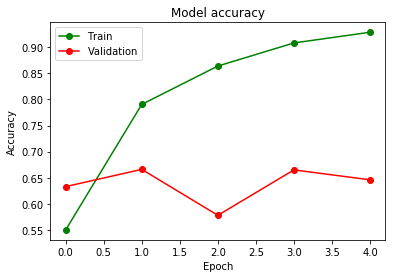

In [33]:
acc_train_val_plot(rnn_history)

### (d) LSTM

i) Now built a LSTM model by replacing the simple RNN layter in the above model with a LSTM layer. Print a summary of the LSTM model.

In [34]:
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(Embedding(max_words, 64, input_length=max_len))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


ii) Train the LSTM model with the same specifications in the simple RNN model. Again, plot the training and validation accuracy across epochs.

In [ ]:
lstm_model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])

lstm_history = lstm_model.fit(data, y,
                            epochs=5, 
                            batch_size = 32,
                            validation_split=0.2)

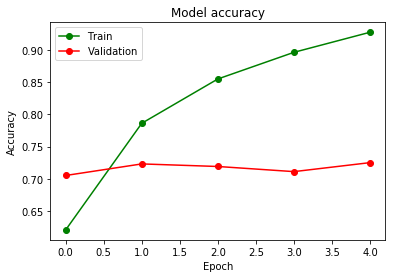

In [36]:
acc_train_val_plot(lstm_history)

### (e) Evaluation on test data

i) Using the simple RNN and LSTM models from the previous parts (do *not* retrain these using the full training dataset; it's fine to use the same models you learned from before where technically 20% of the training data were held out as validation data), evaluate their performance on the *test* set (`test.csv`). What are the test set raw accuracies that you get?

In [37]:
# read test data
test_text = []


with open('HW3-data/test.csv', 'r', encoding='iso8859') as csv_file:
    reader = csv.reader(csv_file)
    included_cols = [0, -1]
    for row in reader:
        content = list(row[i] for i in included_cols)
        test_text.append(content)

random.shuffle(test_text)

print(len(test_text))

498


In [38]:
# feature processing

test_texts = [content[1] for content in test_text]
test_tokenizer = Tokenizer(num_words = max_words)
test_tokenizer.fit_on_texts(test_texts)
test_sequences = test_tokenizer.texts_to_sequences(test_texts)
test_data = pad_sequences(test_sequences, maxlen= max_len)

test_y = np.array([content[0] for content in test_text])

In [39]:
# test
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(test_data, test_y)
print('Test accuracy for rnn:', rnn_test_acc)

lstm_test_loss, lstm_test_acc = lstm_model.evaluate(test_data, test_y)
print('Test accuracy for lstm:', lstm_test_acc)

498/498 [==============================] - 1s 1ms/step
Test accuracy for rnn: 0.44979919774465293
498/498 [==============================] - 1s 3ms/step
Test accuracy for lstm: 0.44377510040160645


ii) In the previous models, we only use the top 5000 tweets. Now train the LSTM-based model using the whole training dataset. Again use 20% of the training dataset as validation. After learning the model, test it on the true test set. What is the test set raw accuracy that you get? How does this test set accuracy compare to the validation accuracy, and to the test set accuracy you got from using only 5000 tweets (or technically 5000\*0.8=4000 tweets to train)?

In [40]:
full_texts = [content[1] for content in text]
full_y = np.array([content[0] for content in text])

full_tokenizer = Tokenizer(num_words=max_words)
full_tokenizer.fit_on_texts(full_texts)
full_sequences = full_tokenizer.texts_to_sequences(full_texts)
full_data = pad_sequences(full_sequences, maxlen=max_len)

In [41]:
len(full_data)

1600000

In [42]:
len(full_y)

1600000

In [43]:
full_lstm_model = Sequential()
full_lstm_model.add(Embedding(max_words, 64, input_length=max_len))
full_lstm_model.add(LSTM(64))
full_lstm_model.add(Dense(1, activation='sigmoid'))
full_lstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


In [46]:
full_lstm_model.compile(optimizer='rmsprop',
                        loss='binary_crossentropy',
                        metrics=['acc'])

In [47]:
full_lstm_history = full_lstm_model.fit(full_data, full_y,
                                        epochs=5,
                                        batch_size=32,
                                        validation_split=0.2)

Train on 1280000 samples, validate on 320000 samples
Epoch 1/5
1280000/1280000 [==============================] - 8522s 7ms/step - loss: 0.4006 - acc: 0.8197 - val_loss: 0.4008 - val_acc: 0.8193
Epoch 2/5
1280000/1280000 [==============================] - 8522s 7ms/step - loss: 0.3950 - acc: 0.8231 - val_loss: 0.3987 - val_acc: 0.8205
Epoch 3/5
1280000/1280000 [==============================] - 8533s 7ms/step - loss: 0.3928 - acc: 0.8246 - val_loss: 0.3993 - val_acc: 0.8204
Epoch 4/5
1280000/1280000 [==============================] - 8513s 7ms/step - loss: 0.3921 - acc: 0.8253 - val_loss: 0.4034 - val_acc: 0.8212
Epoch 5/5
1280000/1280000 [==============================] - 8536s 7ms/step - loss: 0.3923 - acc: 0.8257 - val_loss: 0.4021 - val_acc: 0.8213


In [49]:
val_acc = full_lstm_history.history['val_acc']                                                                                                                                                                                                                                                                                                                                                                             

fill_lstm_test_loss, full_lstm_test_acc = full_lstm_model.evaluate(test_data, test_y)

print('Validation accuracy: {}'.format(val_acc))
print('Test accuracy: {}'.format(full_lstm_test_acc))
print('Test accuracy with only 5000 tweets: {}'.format(lstm_test_acc))

498/498 [==============================] - 1s 3ms/step
Validation accuracy: [0.81931875, 0.82045625, 0.820415625, 0.821240625, 0.82131875]
Test accuracy: 0.5000000007181282
Test accuracy with only 5000 tweets: 0.44377510040160645


The test accuracy is much lower than the validation error due to overfitting issues. 

And it is higher than the test accuracy from 5000 tweets model since larger datasets can train a better model and a higher test accuracy. 